In [35]:
import pandas as pd
import numpy as np
import igraph as ig

# Semana 2

### 1.1) Dados de mobilidade populacional:

Os dados de mobilidade rastreiam o movimento das pessoas no espaço, o que ajuda a explorar a tendência espacial da **propagação do vírus estudado (no nosso caso o COVID-19)**. A Baidu oferece serviço baseado em localização (LBS), baseado no sistema de posicionamento global (GPS), endereços IP, localização de torres de sinalização, Wi-Fi, para busca e mapeamento online, e uma grande variedade de aplicativos e software em dispositivos móveis (Lai et al, 2020).Esses dados foram usados para visualizar a mobilidade populacional em torno do **Ano Novo Chinês** (Merlière, 2020). Os dados de mobilidade são categorizados como **entradas** e **saídas** por província e cidade na China. Pegamos as matrizes de mobilidade diária para província e cidades com dados de entrada e saída no [Baidu Mobility Data - Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/FAEZIO).

In [36]:
# README do Baidu Mobility Data 
with open(r'C:\Users\55119\Documents\Estudos\IC\Semana 2\README.txt', 'r') as file:
    print(file.read())

The source is from Baidu https://qianxi.baidu.com/. 
1. On the Baidu Qianxi website, it just lists the top 100 cities and values indicate the percentages.
2. For baidu_in_.csv, the columns are the in-cities; for baidu_out.csv, the columns are the out-cities.
3. January 1 ~ March 8, the city names are in Chinese; after March 9, the city naems are in English
4. Please read 'Index_City_EN_CH.csv' file to convert the Chinese and English names
5. After April 5, city index added to the names. The order of index and column names keep the same in all files.  


***If you use the data, please cite the data source and our dataset https://doi.org/10.7910/DVN/FAEZIO.



### 1.2) Teoria dos Grafos:
#### 1.2.1) As pontes de Königsberg:
Poucos campos de pesquisa podem traçar seu nascimento até um único momento e lugar na história. A teoria dos grafos, o andaime matemático por trás da **ciência das redes**, pode. Suas raízes remontam a 1735 em Königsberg, a capital da Prússia Oriental, uma próspera cidade mercantil de seu tempo. O comércio apoiado por sua movimentada frota de navios permitiu que as autoridades da cidade construíssem sete pontes sobre o rio Pregel, que cercava a cidade. Cinco delas ligavam ao continente a elegante ilha Kneiphof, presa entre os dois ramos do Pregel. As duas restantes cruzaram os dois braços do rio. Esse arranjo peculiar deu origem a um quebra-cabeça contemporâneo: **pode-se atravessar todas as sete pontes e nunca cruzar a mesma duas vezes?** Apesar de muitas tentativas, ninguém conseguiu encontrar tal caminho. O problema permaneceu sem solução até 1735, quando **Leonard Euler**, um matemático nascido na Suíça, ofereceu uma prova matemática rigorosa de que tal caminho não existe.

Euler representou cada uma das quatro áreas de terra separadas pelo rio com as letras A, B, C e D (Imagem 1.1). Em seguida, ele conectou com linhas cada pedaço de terra que tinha uma ponte entre eles. Ele construiu assim um **grafo**, cujos **nós** eram pedaços de terra e os **links** eram as pontes. Então Euler fez uma observação simples: **se existe um caminho cruzando todas as pontes, mas nunca a mesma ponte duas vezes, então nós com número ímpar de links devem ser o ponto inicial ou final desse caminho**. De fato, **se você chegar a um nó com um número ímpar de links, poderá não ter nenhum link não utilizado para deixá-lo**.

<center>
 
<img src="https://github.com/gabrielxcosta/Simulation-of-epidemiological-models-in-temporal-mobility-networks/blob/main/Semana%202/Konigsberg.jpg?raw=true"/>

<em>a) Um mapa contemporâneo de Königsberg (agora Kaliningrado, Rússia) durante o tempo de Euler.</em>

<em>b) Uma ilustração esquemática dos quatro pedaços de terra de Königsberg e as sete pontes sobre eles.</em>
    
<em>c) Euler construiu um grafo que tem quatro nós (A, B, C, D), cada um correspondendo a um pedaço de terra, e sete links, cada um correspondendo a uma ponte. Ele então mostrou que não há caminho contínuo que cruzaria as sete pontes sem nunca cruzar a mesma ponte duas vezes. O povo de Königsberg desistiu de sua busca infrutífera e em 1875 construiu uma nova ponte entre B e C, aumentando o número de links desses dois nós para quatro. Agora, apenas um nó ficou com um número ímpar de links. Consequentemente, devemos ser capazes de encontrar o caminho desejado.</em> 

</center>

Um caminho que passa por todas as pontes pode ter apenas um ponto inicial e um ponto final. Assim, tal caminho não pode existir em um grafo que tenha mais de dois nós com um número ímpar de links. O grafo de Königsberg tinha quatro nós com um número ímpar de links, A, B, C e D, então nenhum caminho poderia satisfazer o problema.

A prova de Euler foi a primeira vez que alguém resolveu um problema matemático usando um grafo. Para nós, a prova tem duas mensagens importantes: A primeira é que alguns problemas se tornam mais simples e tratáveis ​​se forem representados como um grafo. A segunda é que a existência do caminho não depende de nossa engenhosidade para encontrá-lo. Pelo contrário, é uma propriedade do grafo. De fato, dada a estrutura do grafo de Königsberg, por mais inteligentes que sejamos, nunca encontraremos o caminho desejado. Em outras palavras, as redes possuem propriedades codificadas em sua estrutura que limitam ou melhoram seu comportamento.

Para entender as muitas maneiras pelas quais as redes podem afetar as propriedades de um sistema, precisamos nos familiarizar com a teoria dos grafos, um ramo da matemática que surgiu da prova de Euler.

In [37]:
# Modelando o problema das pontes com a biblioteca IGraph:
konigsbergBridges = ig.Graph(
    n=4, # Número total de vértices ou tamanho do nosso grafo
    edges=[(0, 1), (1, 0), (1, 2), (2, 1), (0, 3), (1, 3), (2, 3)] # Arestas do nosso grafo
    )

konigsbergBridges.vs['name'] = ['B', 'A', 'C', 'D']
konigsbergBridges.vs['label'] = konigsbergBridges.vs['name']
print(konigsbergBridges)

IGRAPH UN-- 4 7 --
+ attr: label (v), name (v)
+ edges (vertex names):
B -- A, A, D         C -- A, A, D
A -- B, B, C, C, D   D -- B, A, C


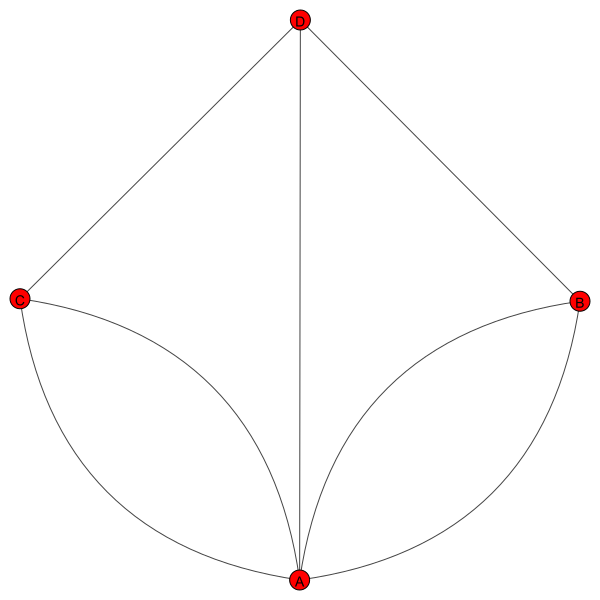

In [38]:
ig.plot(konigsbergBridges)


#### 1.2.2) Redes e grafos:

Se quisermos entender um sistema complexo, primeiro precisamos saber como seus componentes interagem entre si. Em outras palavras, precisamos de um mapa de seu diagrama de fiação. Uma rede é um catálogo de componentes de um sistema frequentemente chamados de **nós** ou **vértices** e as interações diretas entre eles, chamadas de **links** ou **arestas**. Essa representação de rede oferece uma linguagem comum para estudar sistemas que podem diferir muito em natureza, aparência ou escopo. De fato, como mostrado na figura 1.2, três sistemas bastante diferentes têm exatamente a mesma representação de rede.

A Figura 1.2 apresenta dois parâmetros básicos de rede:

**Número de nós**, ou $N$, representa o **número de componentes no sistema**. Frequentemente, chamaremos $N$ o **tamanho da rede**. Para distinguir os nós, nós os rotulamos com $i = 1, 2, ..., N$.

**Número de links**, que denotamos com $L$, representa o **número total de interações entre os nós**. Os links raramente são rotulados, pois **podem ser identificados através dos nós que conectam**. Por exemplo, o link (2, 4) conecta os nós 2 e 4.

As redes mostradas na imagem 1.2 têm $N = 4$ e $L = 4$.

<center>
 
<img src="https://github.com/gabrielxcosta/Simulation-of-epidemiological-models-in-temporal-mobility-networks/blob/main/Semana%202/Networks%20and%20Graphs.jpg?raw=true"/>

<em> **Redes diferentes, mesmo grafo:**
A figura mostra um pequeno subconjunto (a) da Internet, onde roteadores (computadores especializados) estão conectados uns aos outros; (b) a rede de atores de Hollywood, onde dois atores estão conectados se atuaram no mesmo filme; (c) uma rede de interação proteína-proteína, onde duas proteínas são conectadas se houver evidência experimental de que elas podem se ligar uma à outra na célula. Embora a natureza dos nós e dos links seja diferente, essas redes têm a mesma representação gráfica, consistindo em $N = 4$ nós e $L = 4$ links, mostrados em (d). </em>

</center>

Os links de uma rede podem ser **direcionados** ou **não direcionados**. Alguns sistemas têm links direcionados, como a WWW, cujos localizadores uniformes de recursos (URL) apontam de um documento da Web para outro, ou ligações telefônicas, onde uma pessoa liga para a outra. Outros sistemas têm ligações não direcionadas, como laços românticos: se eu namoro Janet, Janet também namora comigo, ou como linhas de transmissão na rede elétrica, nas quais a corrente elétrica pode fluir nos dois sentidos.

Uma rede é dita direcionada (ou **dígrafo**) se todos os seus links forem direcionados; ele é chamado de não direcionado se todos os seus links forem não direcionados. Algumas redes têm simultaneamente links direcionados e não direcionados. Por exemplo, na rede metabólica algumas reações são reversíveis (ou seja, bidirecionais ou não direcionadas) e outras são irreversíveis, ocorrendo em apenas uma direção (direcionada).

As escolhas que fazemos quando representamos um sistema como uma rede determinarão nossa capacidade de usar a ciência de rede com sucesso para resolver um problema específico. Por exemplo, a forma como definimos as ligações entre dois indivíduos dita a natureza das questões que podemos explorar:

• Ao conectar indivíduos que interagem regularmente entre si no contexto de seu trabalho, obtemos a rede organizacional ou profissional, que desempenha um papel fundamental no sucesso de uma empresa ou instituição, e é de grande interesse para a pesquisa organizacional.
    
• Ao unir amigos entre si, obtemos a rede de amizades, que desempenha um papel importante na difusão de ideias, produtos e hábitos e é de grande interesse para a sociologia, o marketing e as ciências da saúde.

• Ao conectar indivíduos que têm uma relação íntima, obtemos a rede sexual, de fundamental importância para a disseminação de doenças sexualmente transmissíveis, como a AIDS, e de grande interesse para a epidemiologia.
    
• Ao usar registros de telefone e e-mail para conectar indivíduos que todos ou enviar e-mail uns aos outros, obtemos a rede de conhecimento, capturando uma mistura de vínculos profissionais, de amizade ou íntimos, importantes para comunicação e marketing.

Também podemos construir redes que podem ser válidas do ponto de vista teórico dos grafos, mas podem ter pouca utilidade prática. Por exemplo, se ligarmos todos os indivíduos com o mesmo nome, Johns com Johns e Marys com Marys, obtemos um grafo bem definido, cujas propriedades podem ser analisadas com as ferramentas da ciência de redes. Sua utilidade é questionável, no entanto. Portanto, para aplicar a teoria de rede a um sistema, considerações cuidadosas devem preceder nossa escolha de nós e links, garantindo sua significância para o problema que desejamos explorar.

#### 1.2.3) Grau, Grau Médio e Distribuição de Grau

Uma propriedade chave de cada nó é o seu **grau**, representando o **número de ligações que possui com outros nós**. O grau pode representar o número de contatos de celular que um indivíduo tem no grafo de chamadas (ou seja, o número de diferentes indivíduos com quem a pessoa conversou) ou o número de citações que um trabalho de pesquisa obtém na rede de citações.

**Grau:**

Denotamos com $k_{i}$ o grau do i-ésimo nó na rede. Por exemplo, para as redes não direcionadas mostradas na imagem 1.2 temos $k_{1} = 2$, $k_{2}=3$, $k_{3}=2$, $k_{4}=1$. **Em uma rede não direcionada, o número total de links, L, pode ser expresso como a soma dos graus dos nós**:

$$L = \frac{1}{2} \sum_{i=1}^{N} k_{i}$$

Aqui o fator $\frac{1}{2}$ corrige o fato de que na soma cada link é contado duas vezes. Por exemplo, o link que conecta os nós 2 e 4 na imagem 1.2 será contado uma vez no grau do nó 1 e uma vez no grau do nó 4.

**Grau Médio:**

Uma propriedade importante de uma rede é o seu grau médio, que para uma **rede não direcionada** é:

$$⟨k⟩ = \frac{1}{N} \sum_{i=1}^{N} k_{i} = \frac{2L}{N}$$ 

Em **redes direcionadas**, distinguimos entre **grau de entrada**, $k_{i}^{in}$, representando o número de links que apontam para o nó $i$, e **grau de saída**, $k_{i}^{out}$, representando o número de links que apontam do nó $i$ para outros nós. Finalmente, o **grau total** de um nó, $k_{i}$, é dado por

$$k_{i} = k_{i}^{in} + k_{i}^{out}$$

Por exemplo, na WWW, o número de páginas para as quais um determinado documento aponta representa seu grau de saída, $k^{out}$, e o número de documentos que apontam para ele representa seu grau de entrada, $k^{in}$. O número total de links em uma rede direcionada é

$$L = \sum_{i=1}^{N} k_{i}^{in} = \sum_{i=1}^{N} k_{i}^{out}$$

O fator $\frac{1}{2}$ visto na primeira equação agora está ausente, pois para redes direcionadas as duas somas contam separadamente os graus de saída e entrada. O grau médio de uma rede direcionada é

$$⟨k^{in}⟩ = \frac{1}{N} \sum_{i=1}^{N} k_{i}^{in} = ⟨k^{out}⟩ = \frac{1}{N} \sum_{i=1}^{N} k_{i}^{out} = \frac{L}{N}$$

**Distribuição de graus:**

A distribuição de grau, $p_{k}$, fornece a probabilidade de que um nó selecionado aleatoriamente na rede tenha grau $k$. Como $p_{k}$ é uma probabilidade, ela deve ser normalizada, ou seja,

$$\sum_{k=1}^{\infty} p_{k} = 1$$

Para uma rede com $N$ nós a distribuição de grau é o histograma normalizado (imagem 1.3) é dado por

$$p_{k} = \frac{N_{k}}{N}$$

onde $N_{k}$ é o número de nós de grau $k$. Portanto, o número de nós de grau $k$ pode ser obtido a partir da distribuição de grau como $N_{k} = N_{p_{k}}$.

A distribuição de graus assumiu um papel central na teoria de redes após a descoberta de **redes livres de escala**. Uma razão é que o cálculo da maioria das propriedades de rede exige que conheçamos $p_{k}$. Por exemplo, o grau médio de uma rede pode ser escrito como

$$⟨k⟩ = \sum_{k=0}^{\infty} k p_{k}$$

A outra razão é que a forma funcional precisa de $p_{k}$ determina muitos fenômenos de rede, desde a robustez da rede até a uma **disseminação de vírus**.

<center>
<img src="https://github.com/gabrielxcosta/Simulation-of-epidemiological-models-in-temporal-mobility-networks/blob/main/Semana%202/Degree%20distribution.jpg?raw=true"/>

<em> A distribuição de grau de uma rede é fornecida pela razão $p_{k} = \frac{N_{k}}{N}$.
     Para a rede em (a) com $N = 4$ a distribuição de grau é mostrada em (b).
     Temos $p_{1} = \frac{1}{4}$ (um dos quatro nós tem grau $k_{1}1 = 1$), $p_{2} = \frac{1}{2}$ (dois nós têm $k3 = k4 = 2$) e $p_{3} = \frac{1}{4}$ (como $k_{2} = 3$). Como não temos nós com grau $k > 3$, $p_{k} = 0$ para qualquer $k > 3$.
     Uma rede unidimensional para a qual cada nó tem o mesmo grau $k = 2$.
     A distribuição de graus de (c) é uma função delta de Kronecker, $p_{k} = δ(k - 2)$.
</em>
</center>

#### 1.2.4) Matriz de adjacências:

Uma descrição completa de uma rede exige que acompanhemos seus links. A maneira mais simples de conseguir isso é fornecer uma lista completa dos links. Por exemplo, a rede da imagem 1.2 é descrita exclusivamente listando seus quatro links: {(1, 2), (1, 3), (2, 3), (2, 4)}. Para fins matemáticos, muitas vezes representamos uma rede por meio de sua **matriz de adjacências**. A matriz de adjacências de uma rede direcionada de $N$ nós possui $N$ linhas e $N$ colunas, sendo seus elementos:

$A_{ij} = 1$ se houver um link apontando do nó $j$ para o nó $i$;

$A_{ij} = 0$ se os nós $i$ e $j$ não estiverem conectados entre si.

A matriz de adjacência de uma rede não direcionada tem duas entradas para cada link, por exemplo. link (1, 2) é representado como $A_{12} = 1$ e $A_{21} = 1$. Portanto, a **matriz de adjacência de uma rede não direcionada é simétrica**, $Aij = Aji$ (Imagem 1.4b)

O grau $k_{i}$ do nó $i$ pode ser obtido diretamente dos elementos da matriz de adjacência. Para redes não direcionadas, o grau de um nó é uma soma sobre as linhas ou colunas da matriz, ou seja,

$$k_{i} = \sum_{j=1}^{N} A_{ji} = \sum_{i=1}^{N} A_{ji}$$

Para **redes direcionadas, as somas sobre as linhas e colunas da matriz de adjacência fornecem os graus de entrada e saída**, respectivamente

$$k_{i}^{in} = \sum_{j=1}^{N} A_{ij}, k_{i}^{out} = \sum_{j=1}^{N} A_{ji}$$

Dado que em uma rede não direcionada o número de links de saída é igual ao número de links de entrada, temos

$$2L = \sum_{i=1}^{N} k_{i}^{in} = \sum_{i=1}^{N} k_{i}^{out} = \sum_{ij}^{N} A_{ij}$$

O número de elementos diferentes de zero da matriz de adjacência é $2L$, ou duas vezes o número de links. De fato, um link não direcionado conectando os nós $i$ e $j$ aparece em duas entradas: $A_{ij} = 1$, um link apontando do nó $j$ para o nó $i$, e $A_{ji} = 1$, um link apontando de $i$ para $j$ (figura 1.4b).

<center>
<img src="https://github.com/gabrielxcosta/Simulation-of-epidemiological-models-in-temporal-mobility-networks/blob/main/Semana%202/Adjacency%20matrix.jpg?raw=true"/>

<em> A rotulagem dos elementos da matriz de adjacência.
     A matriz de adjacência de uma rede não direcionada. A figura mostra que o grau de um nó (neste caso o nó $2$) pode ser expresso como a soma sobre a coluna ou linha apropriada da matriz de adjacência. Também mostra algumas características básicas da rede, como o número total de links, $L$, e o grau médio, $‹k›$, expresso em termos dos elementos da matriz de adjacência.
     O mesmo que em (b), mas para uma rede direcionada.
</em>
</center>

## baidu_in_20200101 - Janeiro
### 2.1) Construindo a matriz de adjacências:

In [39]:
# Lendo o arquivo CSV e criando um DataFrame a partir do mesmo
dfJanuary = pd.read_csv(r'C:\Users\55119\Documents\Estudos\IC\Semana 2\baidu_in_20200101.csv')

dfJanuary.info()

In [ ]:
dfJanuary.head(10)

In [ ]:
# Preenchendo os NaN com zeros
dfJanuary = dfJanuary.fillna(0)

dfJanuary.head(10)

In [ ]:
cityNamesJan = dfJanuary.pop('city_name')
adjMatrixJan = dfJanuary.values
print(adjMatrixJan)

### 2.2) Criando um grafo a partir da matriz:

In [ ]:
gJan = ig.Graph.Weighted_Adjacency(
    adjMatrixJan.tolist()
)

In [ ]:
ig.plot(gJan)

## baidu_in_20200102 - Fevereiro
### 3.1) Matriz de adjacências:

In [ ]:
# Lendo o arquivo CSV e criando um DataFrame a partir do mesmo
dfFebruary = pd.read_csv(r'C:\Users\55119\Documents\Estudos\IC\Semana 2\baidu_in_20200102.csv')

dfFebruary.info()

In [ ]:
dfFebruary.head(10)

In [ ]:
# Preenchendo os NaN com zeros
dfFebruary = dfFebruary.fillna(0)

dfFebruary.head(10)

In [ ]:
cityNamesFeb = dfFebruary.pop('city_name')
adjMatrixFeb = dfFebruary.values
print(adjMatrixFeb)

### 3.2) Criando um grafo a partir da matriz:

In [ ]:
gFeb = ig.Graph.Weighted_Adjacency(
    adjMatrixFeb.tolist()
)

In [ ]:
ig.plot(gFeb)